In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
walmart_df = pd.read_excel("Walmart_store_data.xlsx")
walmart_df.head()

,Store_ID,City,Week,Weekly_Revenue,Weekly_Customer_Visits,Stock_Levels,Turnover_Rate,Overstock_Incidents,Stockout_Incidents,Weather,Temperature_C
0,WLMRT001,"San Francisco, CA",1,146236.20,1499,1597.99,1.70,2,1,Foggy,13.2
1,WLMRT001,"San Francisco, CA",2,136742.51,1465,1401.67,1.92,1,0,Partly Cloudy,19.8
2,WLMRT001,"San Francisco, CA",3,159973.28,2639,772.74,0.87,1,1,Foggy,12.1
3,WLMRT001,"San Francisco, CA",4,135691.87,1779,1099.79,0.59,2,1,Partly Cloudy,12.7
4,WLMRT001,"San Francisco, CA",5,153551.58,2221,1974.85,1.43,0,0,Mild,17.4


In [7]:
walmart_df.shape

(520, 11)

In [8]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Store_ID                520 non-null    object 
 1   City                    520 non-null    object 
 2   Week                    520 non-null    int64  
 3   Weekly_Revenue          520 non-null    float64
 4   Weekly_Customer_Visits  520 non-null    int64  
 5   Stock_Levels            520 non-null    float64
 6   Turnover_Rate           520 non-null    float64
 7   Overstock_Incidents     520 non-null    int64  
 8   Stockout_Incidents      520 non-null    int64  
 9   Weather                 520 non-null    object 
 10  Temperature_C           520 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 44.8+ KB


In [9]:
walmart_df.isnull().sum()

Store_ID                  0
City                      0
Week                      0
Weekly_Revenue            0
Weekly_Customer_Visits    0
Stock_Levels              0
Turnover_Rate             0
Overstock_Incidents       0
Stockout_Incidents        0
Weather                   0
Temperature_C             0
dtype: int64

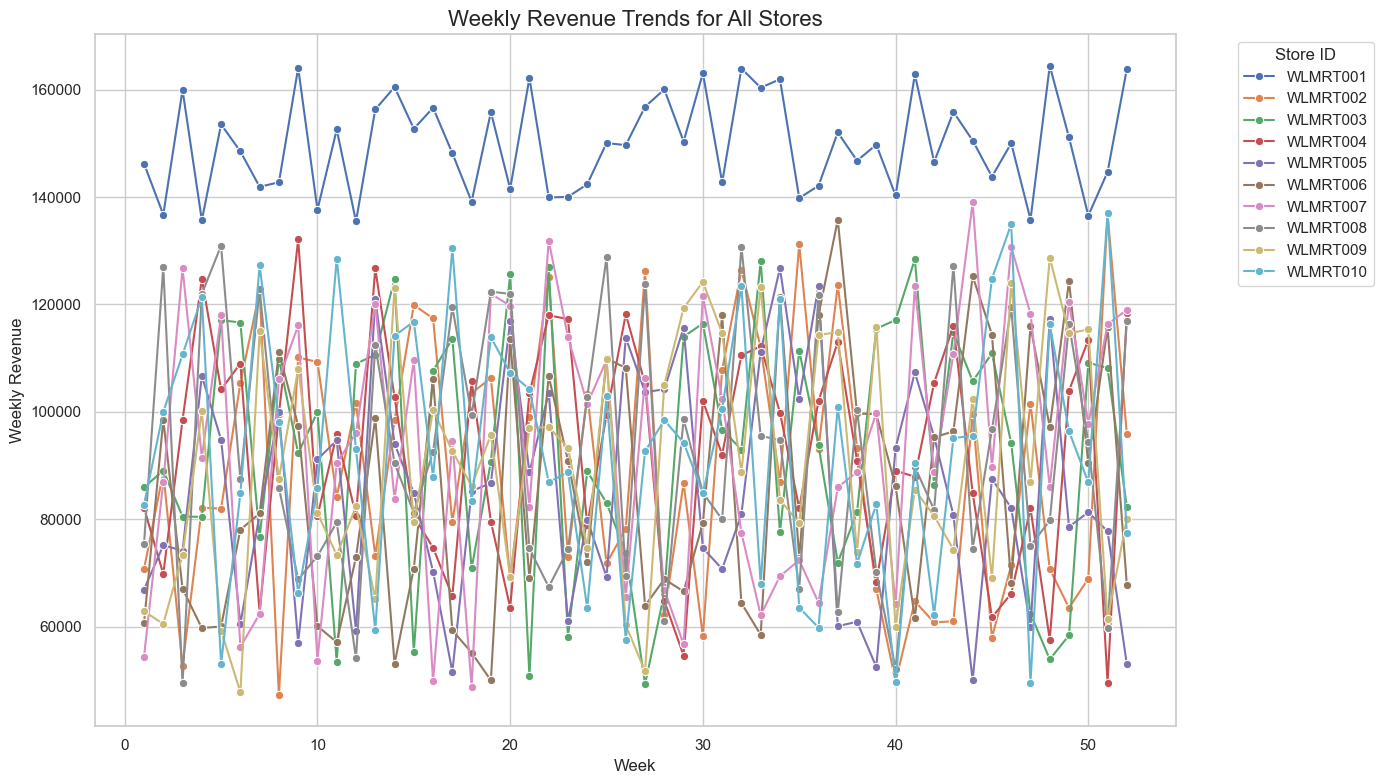

In [11]:
# A line chart showing revenue trends for all stores vs weeks
# Set the plot style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=walmart_df, x='Week', y='Weekly_Revenue', hue='Store_ID', marker='o')

# Add titles and labels
plt.title('Weekly Revenue Trends for All Stores', fontsize=16)
plt.xlabel('Week')
plt.ylabel('Weekly Revenue')
plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

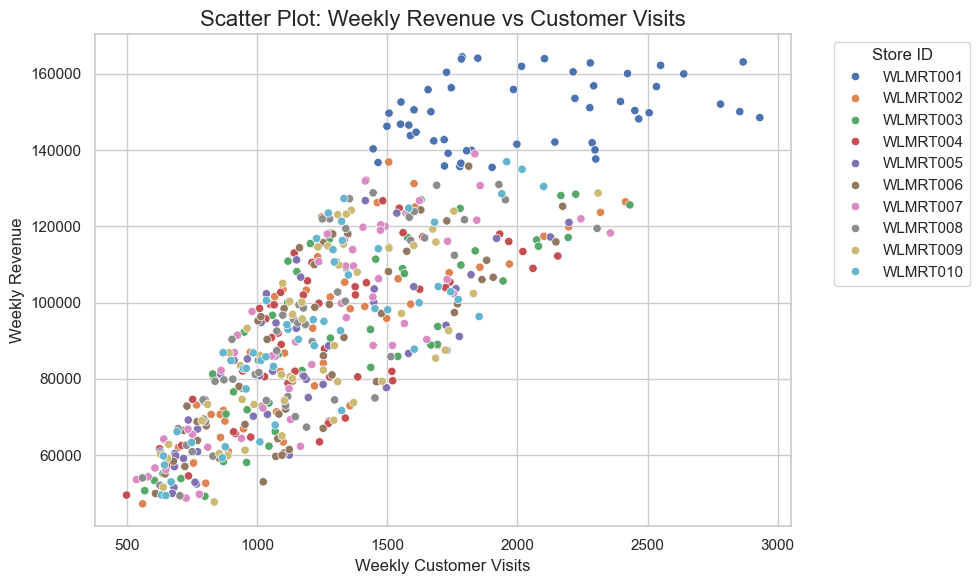

In [17]:
# Create a scatter plot to visualize the relationship between revenue and visits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=walmart_df, x='Weekly_Customer_Visits', y='Weekly_Revenue', hue='Store_ID')

# Add titles and labels
plt.title('Scatter Plot: Weekly Revenue vs Customer Visits', fontsize=16)
plt.xlabel('Weekly Customer Visits')
plt.ylabel('Weekly Revenue')
plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

C:\Users\devmy\AppData\Local\Temp\ipykernel_14748\477820700.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_revenue_by_weather, x='Weather', y='Weekly_Revenue', palette='viridis')


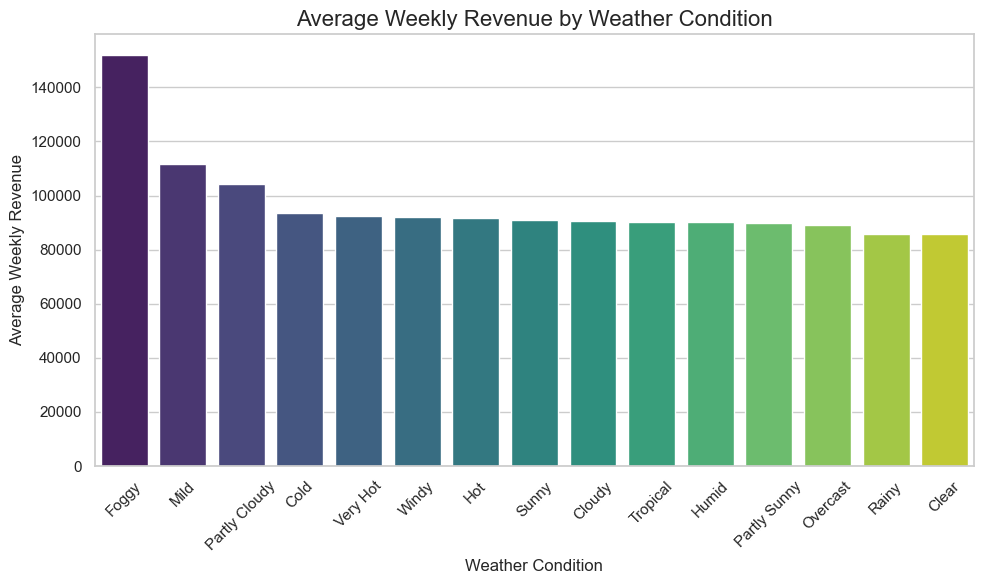

In [19]:
#Bar charty showing average weekly revenue by weather conditions

avg_revenue_by_weather = walmart_df.groupby('Weather')['Weekly_Revenue'].mean().reset_index()
avg_revenue_by_weather = avg_revenue_by_weather.sort_values(by='Weekly_Revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_revenue_by_weather, x='Weather', y='Weekly_Revenue', palette='viridis')
plt.title('Average Weekly Revenue by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition')
plt.ylabel('Average Weekly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

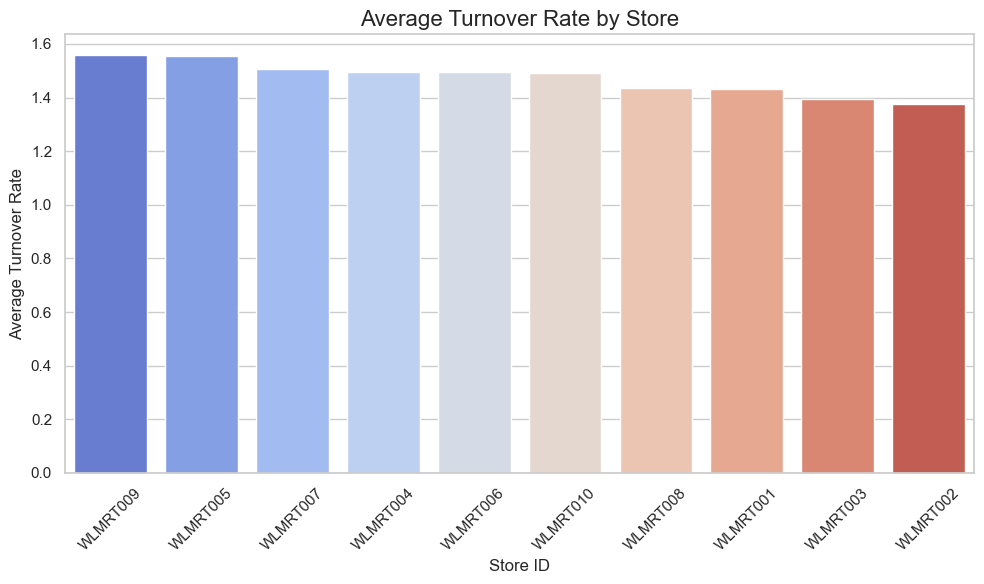

In [24]:
#Visualize the turnover rate by Store
# Calculate average turnover rate by store
avg_turnover_by_store = walmart_df.groupby('Store_ID')['Turnover_Rate'].mean().reset_index()

# Sort values for better visualization
avg_turnover_by_store = avg_turnover_by_store.sort_values(by='Turnover_Rate', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_turnover_by_store, x='Store_ID', y='Turnover_Rate', palette='coolwarm', hue='Store_ID')

# Add titles and labels
plt.title('Average Turnover Rate by Store', fontsize=16)
plt.xlabel('Store ID')
plt.ylabel('Average Turnover Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\devmy\AppData\Local\Temp\ipykernel_14748\3977609552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=walmart_df, x='Weather', y='Weekly_Revenue', palette='pastel')


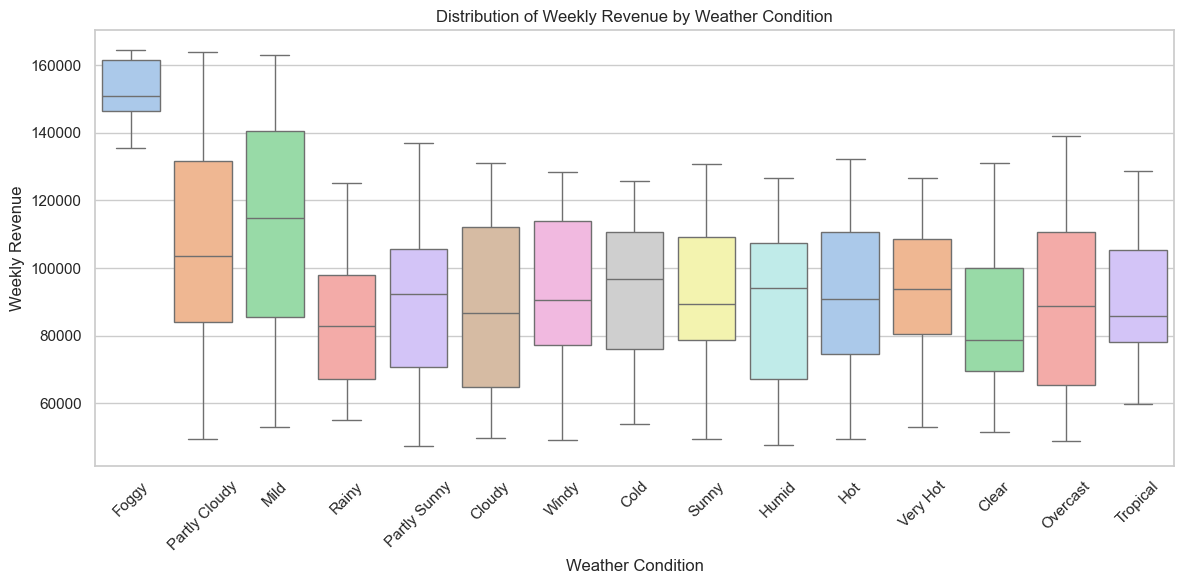

In [26]:
#Explore the rship between Revenue and Weather
plt.figure(figsize=(12, 6))
sns.boxplot(data=walmart_df, x='Weather', y='Weekly_Revenue', palette='pastel')
plt.title('Distribution of Weekly Revenue by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Weekly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\devmy\AppData\Local\Temp\ipykernel_14748\3383272420.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_turnover_by_store_sorted, x='Store_ID', y='Turnover_Rate', palette='coolwarm')


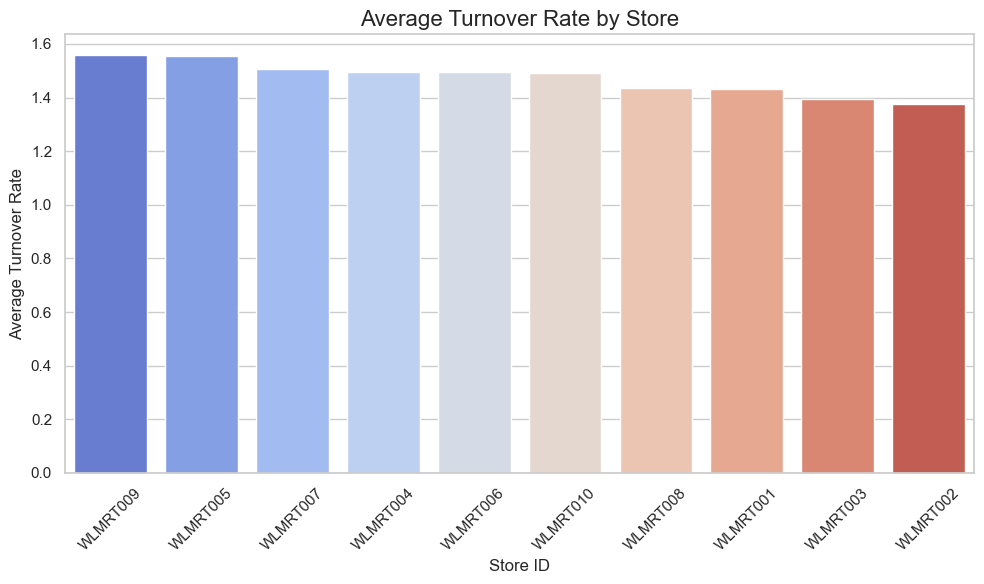

In [31]:
#Showing the store with the highest and lowest Average Turnover Rate
# Sort turnover rates for better visualization
avg_turnover_by_store_sorted = avg_turnover_by_store.sort_values(by='Turnover_Rate', ascending=False).reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_turnover_by_store_sorted, x='Store_ID', y='Turnover_Rate', palette='coolwarm')

# Add titles and labels
plt.title('Average Turnover Rate by Store', fontsize=16)
plt.xlabel('Store ID')
plt.ylabel('Average Turnover Rate')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

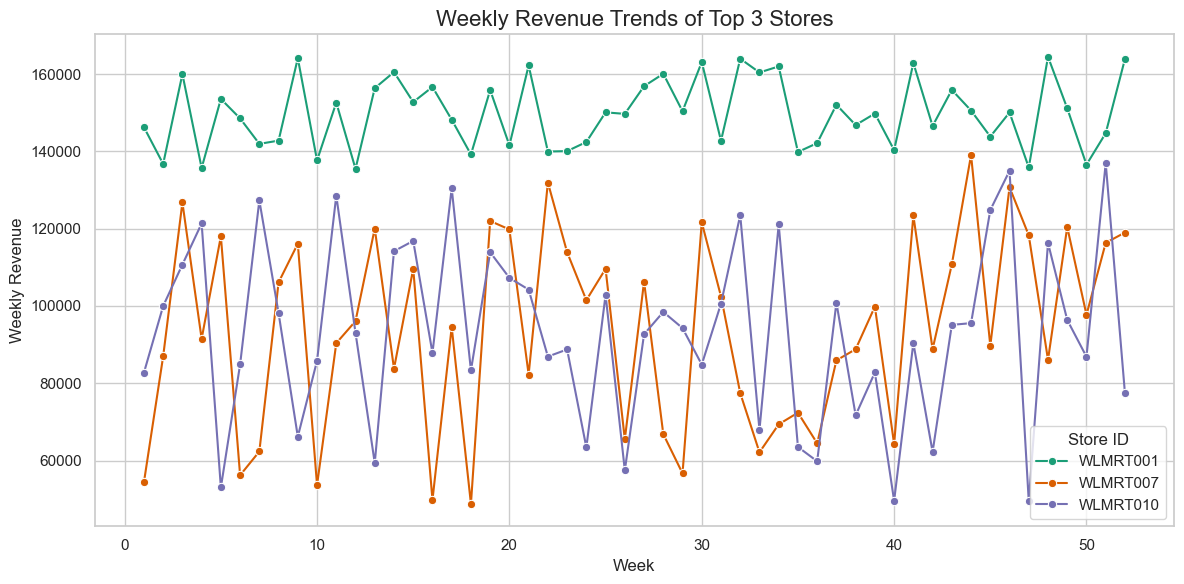

In [39]:
# Compute total revenue by store and get top 3
top_stores = walmart_df.groupby('Store_ID')['Weekly_Revenue'].sum().nlargest(3).index.tolist()

# Filter data for top 3 stores
top_stores_df = walmart_df[walmart_df['Store_ID'].isin(top_stores)]

# Plot revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_stores_df, x='Week', y='Weekly_Revenue', hue='Store_ID', marker='o', palette='Dark2')
plt.title('Weekly Revenue Trends of Top 3 Stores', fontsize=16)
plt.xlabel('Week')
plt.ylabel('Weekly Revenue')
plt.legend(title='Store ID')
plt.tight_layout()
plt.show()

C:\Users\devmy\AppData\Local\Temp\ipykernel_14748\641332074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=walmart_df, x='Store_ID', y='Weekly_Revenue', palette='Set3')


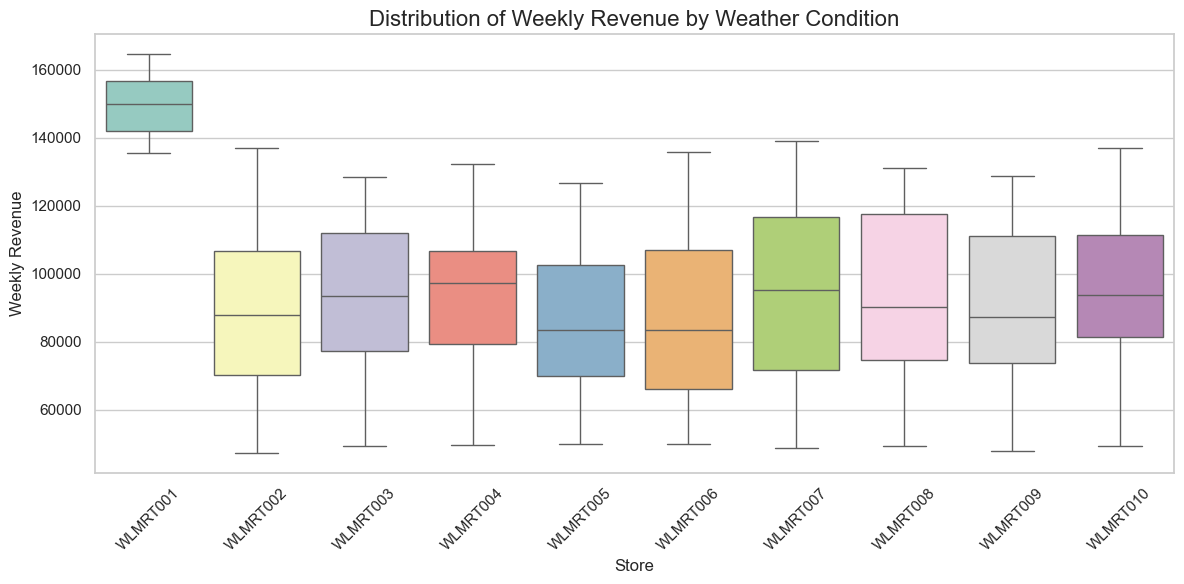

In [43]:
# Visualization 2: Box Plot of Revenue by Store
plt.figure(figsize=(12, 6))
sns.boxplot(data=walmart_df, x='Store_ID', y='Weekly_Revenue', palette='Set3')

# Customize the plot
plt.title('Distribution of Weekly Revenue by Weather Condition', fontsize=16)
plt.xlabel('Store')
plt.ylabel('Weekly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

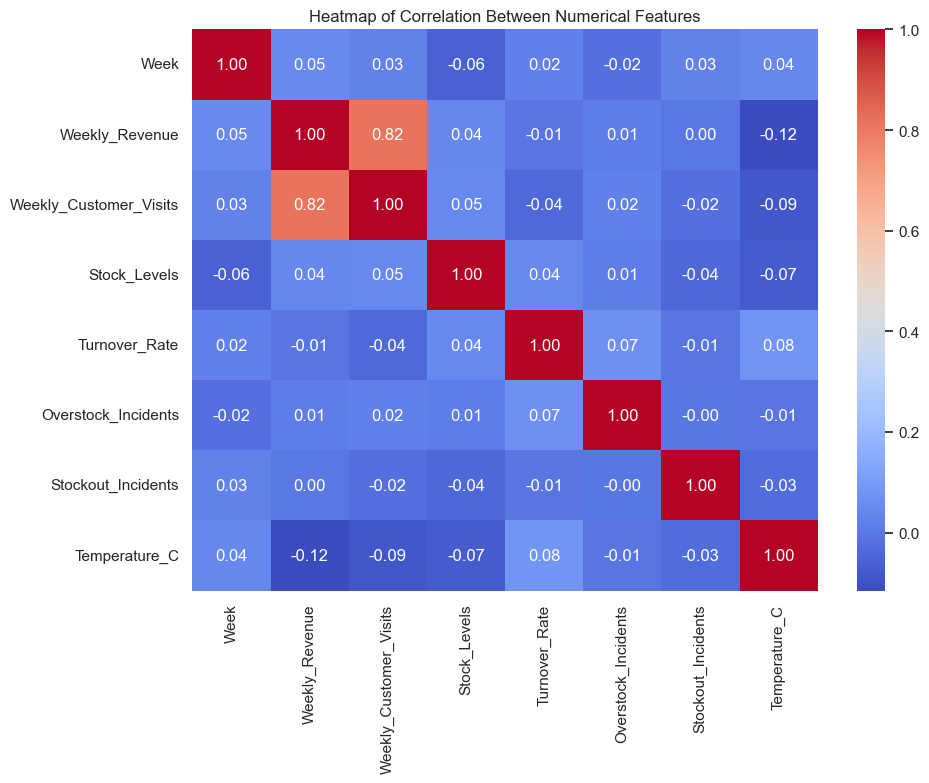

In [36]:
# Visualization 3: Heatmap of Feature Correlations
# Select only numerical columns
numerical_df = walmart_df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlation Between Numerical Features")
plt.tight_layout()
plt.show()